# Predicting House prices in Bengaluru

### The following table of contents will help navigation
1. <a href="#section-1">Data Understanding</a>
 * <a href="#section-1">Raw Data</a>
 * <a href="#section-1-2">Tidy Data</a>
 * <a href="#section-1-3">Clean Data</a>
    * <a href="#section-1-3-1">Categorical Features</a>
2. <a href="section-2">Data Preparation</a> [XX Not Operable]

### This is a Machine Hack competition dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Predicting-House-Prices-In-Bengaluru-Train-Data.csv")

## <a id="section-1"><font color="#f44336">Step 1.1: </font>Data Understanding <center><font color="#2196F3"><u>Raw Data</u></font></center></a>

In [3]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
print("Number of features: {}\nNumber of examples: {}".format(df.shape[1],df.shape[0]))

Number of features: 9
Number of examples: 13320


In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## <a id="section-1-2"><font color="#f44336">Step 1.2: </font>Data Understanding <center><font color="#2196F3"><u>Tidy Data</u></font></center></a>

> **It is essential to tidy the raw data before cleaning it. Following are the crucial steps to tidy the data:**
* Check for complete duplicate examples and remove them
* Check for cardinality of features and remove constant cardinality if any

**After the above steps prepare a new dataframe called the tidy dataframe**

In [6]:
# saving the raw data in a raw dataframe
df_raw = df

In [7]:
# Are duplicates in the data
df_raw[df_raw.duplicated(keep="first")]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.00
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.00
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.50
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.00
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.00
1449,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,3 BHK,GrrvaGr,1693,3.0,3.0,57.39
1477,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1330,2.0,1.0,56.00
1668,Super built-up Area,Ready To Move,Bisuvanahalli,3 BHK,Prityel,1075,2.0,1.0,45.00
1763,Super built-up Area,Ready To Move,KUDLU MAIN ROAD,3 BHK,NaN,1464,3.0,2.0,56.00
2050,Super built-up Area,Ready To Move,Haralur Road,2 BHK,RInceeg,1140,2.0,2.0,43.00


>**<font color="#009688">FINDINGS: </font>**
* The above 529 examples are exact duplicates present data
* This approximately 4% of the entire training data

**<font color="##CDDC39">These examples will be dropped</font>**

In [8]:
# Dropping all duplicates
df_raw.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates the number of examples have reduced to \n\t\t{} from 13320".format(len(df_raw)))

After dropping duplicates the number of examples have reduced to 
		12791 from 13320


In [9]:
# Check for cardinality in each feature
df_features = []
df_unique = []
df_dtype = []
for cols in df_raw.columns:
    df_features.append(cols)
    df_unique.append(str(len(df_raw[cols].unique())))
    df_dtype.append(df_raw[cols].dtype)
df_cardinality = pd.DataFrame()
df_cardinality['Features'] = df_features
df_cardinality['Cardinality'] = df_unique
df_cardinality['Type'] = df_dtype
df_cardinality

,Features,Cardinality,Type
0,area_type,4,object
1,availability,81,object
2,location,1306,object
3,size,32,object
4,society,2689,object
5,total_sqft,2117,object
6,bath,20,float64
7,balcony,5,float64
8,price,1994,float64


>**<font color="#009688">FINDINGS: </font>**
* There are no features with a constant cardinality

**<font color="##CDDC39">We shall look closer for each feature's values</font>**

In [10]:
# Look for feature's unique values
print('\t\tFeature:Cardinality\n\t\t\t[Values]')
for cols in df_raw.columns:
    print('{}:{}\n\t{}'.format(cols,str(len(df_raw[cols].unique())),df_raw[cols].unique()))

		Feature:Cardinality
			[Values]
area_type:4
	['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
availability:81
	['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
location:1306
	['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas na

>**<font color="#009688">FINDINGS: </font>**
* **<font color="#9C27B0">Area Type: </font>** No issues
* **<font color="#9C27B0">Availability: </font>** There are no issues at the moment but we might only use Months
* **<font color="#9C27B0">Location: </font>** No issues
* **<font color="#9C27B0">Size: </font>** Remove outliers and change them to numeric
* **<font color="#9C27B0">Society: </font>** There seems to be unwanted data we shall remove them
* **<font color="#9C27B0">Total Square Feet: </font>** Some are numbers and some are range
* **<font color="#9C27B0">Bath: </font>** Missing values and outliers
* **<font color="#9C27B0">Price: </font>** No issues

**<font color="##CDDC39">All of the issues will be handled in cleaning stage of the data</font>**

In [11]:
# We have created the tidy dataset
df_tidy = df_raw

## <a id="section-1-3"><font color="#f44336">Step 1.3: </font>Data Understanding <center><font color="#2196F3"><u>Clean Data</u></font></center></a>

**This part of the book is the most essential we will perform the following functions**
* Converting features to either continuous or categorical types
* Checking each feature 1 by 1 for data quality issues

> **Data Quality issues can include checks for: **
- Presence of outliers,
- Missing values
- Skewed distributions of the feature
- +ve or -ve Correlations


* Generating the data quality report

In [13]:
df_clean = df_tidy

### *<font color="#F9A825">Converting to appropriate datatypes</font>*

In [30]:
df_clean.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [31]:
df_continuous = df_clean.select_dtypes('float64')
df_categorical = df_clean.select_dtypes('object')

In [32]:
df_continuous.head()

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00


In [33]:
df_categorical.head()

,area_type,availability,location,size,society,total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200


<hr>
**Begin with data understanding**

## <a id="section-1-3-1"><font color="#1E88E5">&#9658; Categorical Features</font></a>

#### Feature 1:  *<font color="#4CAF50">Area Type</font>*

In [12]:
pd.unique(df_clean['area_type'].values.ravel())

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

>**<font color="#009688">FINDINGS: </font>**
* We can see that area type has just 4 unique values
* The issue here is that there are unwanted extra spaces. These spaces are consistent but we will still clean them

**<font color="##CDDC39">Vectorization will be used for a faster process</font>**

In [14]:
# Removing extra spaces
df_clean.area_type = df.area_type.replace('\s+',' ',regex=True)

In [15]:
# Checking if it worked
pd.unique(df_clean['area_type'].values.ravel())

array(['Super built-up Area', 'Plot Area', 'Built-up Area', 'Carpet Area'],
      dtype=object)

The feature **Area Type** is cleaned

In [41]:
# Now see how many per group
df_area_type_grouped = df_clean.groupby(['area_type']).agg(['count']).reset_index()

Text(0,1,'Area vs Price')

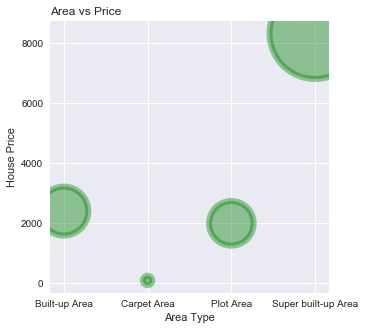

In [55]:
# Understanding the behaviour of area type with price
sns.set()
f,ax = plt.subplots(figsize=(5,5))
plt.scatter(df_area_type_grouped['area_type'], df_area_type_grouped['price'],s=df_area_type_grouped['price']['count'], c="green", alpha=0.4, linewidth=6)
# Add titles (main and on axis)
plt.xlabel("Area Type")
plt.ylabel("House Price")
plt.title("Area vs Price", loc="left")

>**<font color="#009688">FINDINGS: </font>**
* Carpet Area has the least count of properties in the data
* Super built-up Area have the most number of properties listed in this data
* Built up area and Plot area are averaged out approximately around 2000 examples

#### Feature 2:  *<font color="#4CAF50">Availability</font>*

In [17]:
print(pd.unique(df_clean['availability'].values.ravel()))
print(len(pd.unique(df_clean['availability'].values.ravel())))

['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
81


>**<font color="#009688">FINDINGS: </font>**
* There are around 81 unique values
* This data seems well distributed. We need to understand this feature more
* We will plot this feature to know more about it

**<font color="##CDDC39">Plotting count plot will be helpful to understand the distribution and importance of this feature</font>**

In [57]:
# Now see how many per group
df_availability_grouped = df_clean.groupby(['availability']).agg(['count']).reset_index()

In [58]:
df_availability_grouped

,availability,area_type,location,size,society,total_sqft,bath,balcony,price
,,count,count,count,count,count,count,count,count
0,14-Jul,1,1,1,1,1,1,1,1
1,14-Nov,1,1,1,0,1,1,1,1
2,15-Aug,1,1,1,1,1,1,1,1
3,15-Dec,1,1,1,1,1,1,1,1
4,15-Jun,1,1,1,1,1,1,1,1
5,15-Nov,2,2,2,1,2,2,0,2
6,15-Oct,2,2,2,2,2,2,0,2
7,16-Dec,4,4,4,2,4,4,4,4
8,16-Jan,1,1,1,1,1,1,1,1


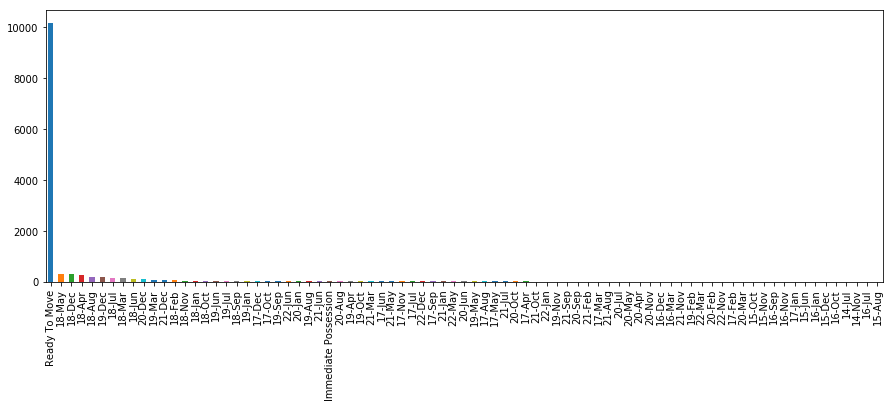

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
df_clean['availability'].value_counts().plot(ax=ax, kind='bar')

>**<font color="#009688">FINDINGS: </font>**
* The maximum examples in the dataset are about Ready to Move properties
* Most of the other values have just single examples, it will be much better to group them into Months

**<font color="##CDDC39">Next step in <a href="section-2">Data Preparation</a> will be to convert the rest of the columns into just Month</font>**

In [28]:
# sns.boxplot(df_clean['availability'])

In [29]:
# # Here we will use a much better version of plotting this feature
# # We will divide the entire plot in two parts:
# # 1. A box plot showing the statistical distribution along the Inter Quartile Range helping us understand
# #    Mean, Std Dev Min and Max values
# # 2. A histogram display the behavioural distribution of the feature

# # Getting the figure and axes for bot the parts
# ########## EXPLANATION:::::::::
# ################## We are creating just one figure [['f']] and two axes [['ax_box'],['ax_hist']] names are self-explanatory
# ################## We then ask matplotlib to split the [['f']] (figure) in [['nrows = 2']] i.e., 2 rows
# ################## The 2 rows are going to share the same x axis
# ################## Then providing the heigh ratios for both the plots to the GridSpec constructor to layout the appropriate
# ##################### grid layout for us
# f, (ax_box, ax_his) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)})

# # Add a graph in each part
# sns.boxplot(df_clean['availability'], ax=ax_box)
# sns.distplot(df_clean['availability'], ax=ax_hist)

# # Remove x axis name for the boxplot
# ax_box.set(xlabel='')